 # Retinal Fundus Image Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
train_data_dir ='raw_data/Training'
test_data_dir ='raw_data/Evaluation_Set'

In [3]:
!pwd

/Users/mac/code/gomezpaula658/eye_spy_peekaboo_for_health


In [4]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
img = load_img(f"{train_data_dir}/55.png")

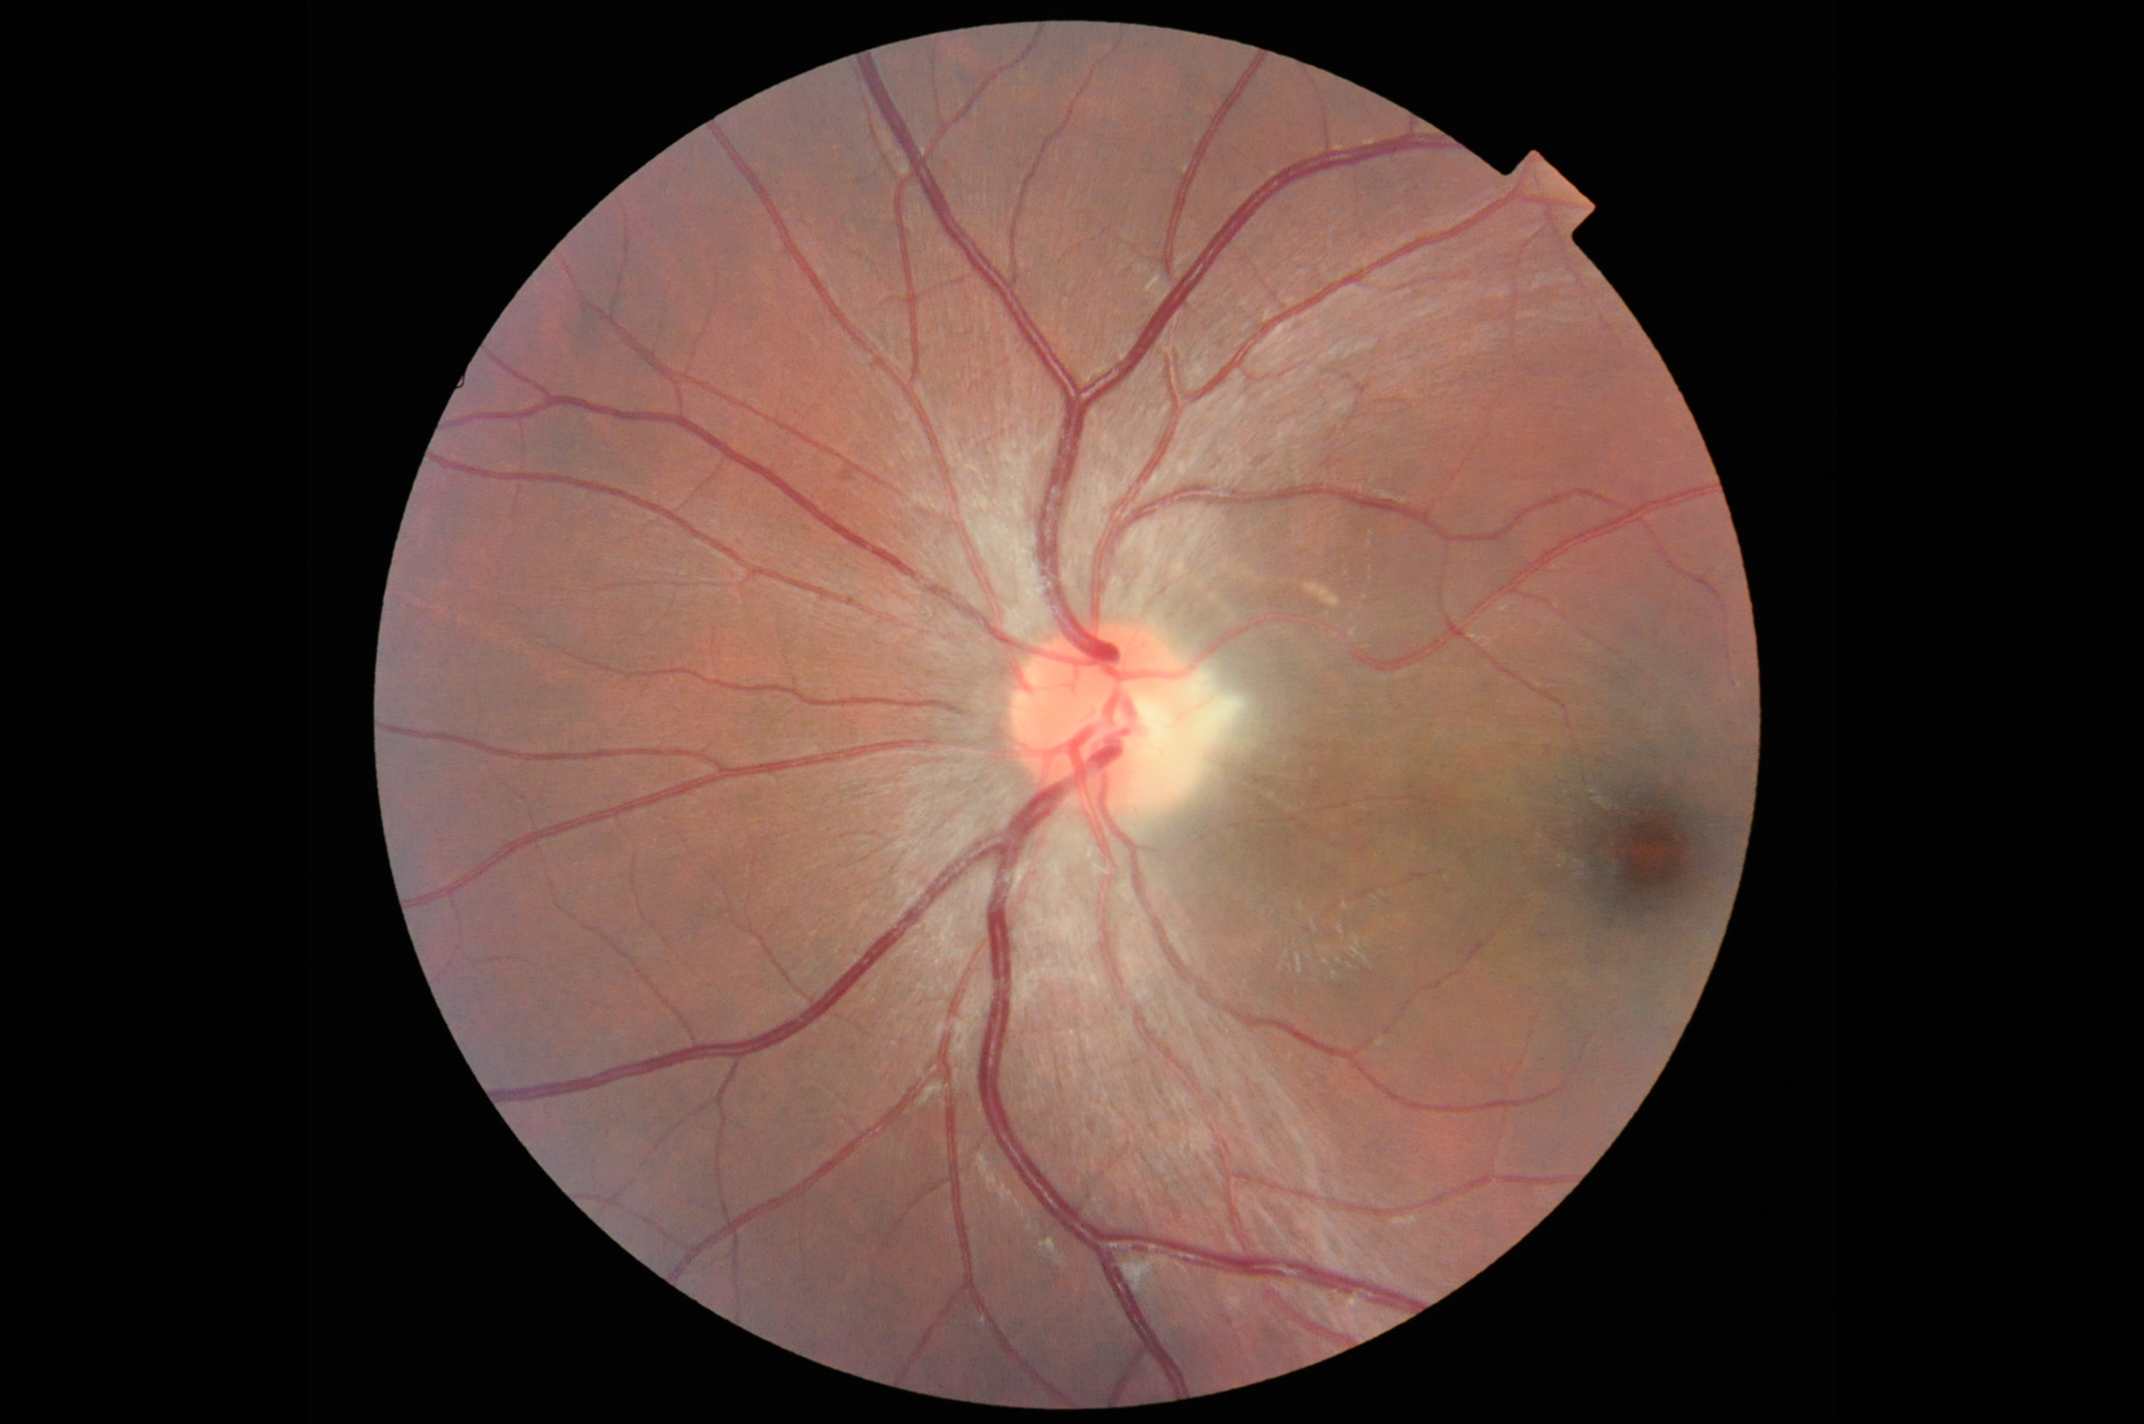

In [5]:
img

# Image Reshape

In [6]:
np.array(img).shape

(1424, 2144, 3)

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [7]:
x = img_to_array(img)/255
x.shape

(1424, 2144, 3)

# Image Resize

In [32]:
Image Resizing

SyntaxError: invalid syntax (3799349193.py, line 1)

# Data Augmentation

In [ ]:
#model instantiation

model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(150, 150,3)))

In [ ]:
#Data augmentation
model.add(layers.RandomFlip("horizontal"))
model.add(layer.RandomZoom(0.1))
model.add(layer.RandomTranslation(0.2, 0.2))
model.add(layers.RandomRotation(0.1))

#Convulation Layers

# Model


In [19]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks

In [20]:
model = Sequential()

In [21]:
model.add(layers.Rescaling(1./255, input_shape = (150, 150, 3)))
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

In [22]:
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

In [23]:
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

In [24]:
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )


In [25]:
model.add(layers.Flatten())

In [26]:
# Here we flatten our data to end up with just one dimension

model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation="sigmoid")) #binary classsification betwen healthy and unhealthy, therefore 1 

# And we perform the prediction using sigmoid

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 64)        1

In [28]:
#model compile with the optimizer 

adam = optimizers.Adam(learning_rate = 0.001)
model.compile( loss= 'binary_crossentropy',
             optimizer = adam, 
             metrics =['accuracy'])

In [29]:
batch_size = 64

New heading

# Tensorflow Datasets

In [30]:
#this is to load images by groups

#train set 
train_ds = image_dataset_from_directory(
train_data_dir,
labels = 'inferred',
label_mode ='binary',
seed =123,
image_size=(150,150),
batch_size=batch_size)

#testing set 
val_ds = image_dataset_from_directory(
test_data_dir,
labels = 'inferred',
label_mode ='binary',
seed =123,
image_size=(150,150),
batch_size=batch_size)

NameError: name 'image_dataset_from_directory' is not defined